### Importing necessary libraries and packages

In [58]:
from sklearn.model_selection import train_test_split # splitting the dataset
from sklearn.preprocessing import PolynomialFeatures # regression algorithm
from sklearn.linear_model import LinearRegression # regression algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting

In [59]:
df = pd.read_csv("Dataset/Point_Values.csv")
df.head()

,Points,Values
0,-3,-4143
1,-2,-338
2,-1,-7
3,0,0
4,1,1


In [60]:
df.describe()

,Points,Values
count,8.00000,8.0000
mean,0.50000,605.0000
std,2.44949,3546.0759
min,-3.00000,-4143.0000
25%,-1.25000,-89.7500
50%,0.50000,0.5000
75%,2.25000,195.7500
max,4.00000,8548.0000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Points  8 non-null      int64
 1   Values  8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


In [62]:
df.columns

Index(['Points', 'Values'], dtype='object')

In [63]:
df.corr()

,Points,Values
Points,1.000000,0.776612
Values,0.776612,1.000000


In [64]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

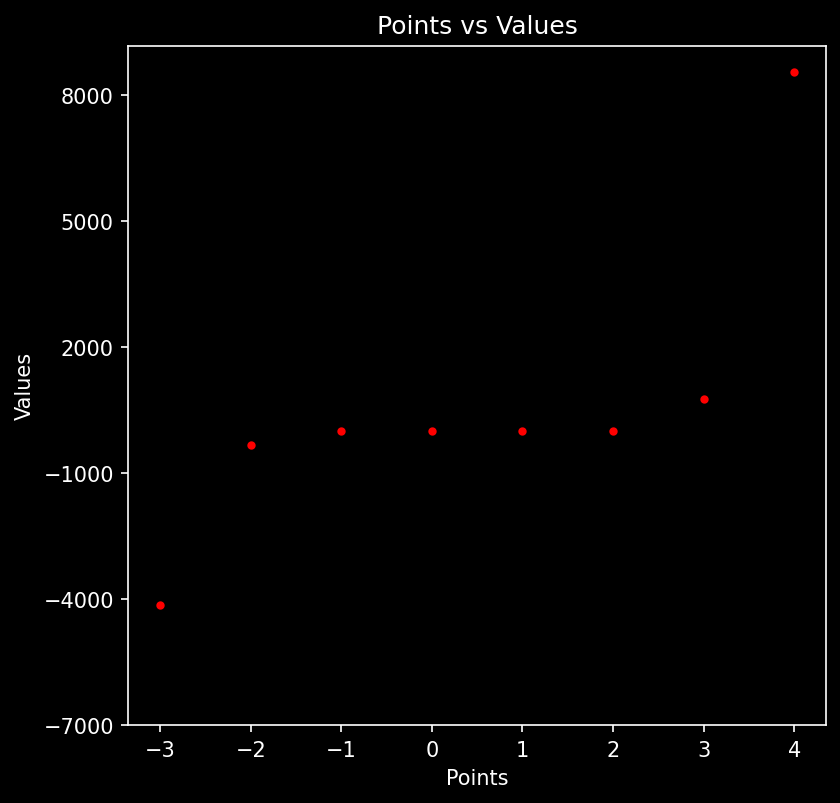

In [65]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Points = df['Points']
Values = df['Values']
plt.scatter(Points, Values, marker=".", color="red")
plt.xticks(np.arange(-3, 5, 1))
plt.yticks(np.arange(-7000,9000,3000))
plt.title("Points vs Values")
plt.xlabel("Points")
plt.ylabel("Values")
plt.savefig("Images/Years_Experience_vs_Salary.png",bbox_inches='tight')

In [66]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
rmse=[]
for i in range(1, 10):
    poly_reg = PolynomialFeatures(degree=i)
    x_poly= poly_reg.fit_transform(X)
    lin_reg= LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred= lin_reg.predict(x_poly)
    rmse.append(np.sqrt(mean_squared_error(y, y_pred)))

([<matplotlib.axis.XTick at 0x26f9190a8c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

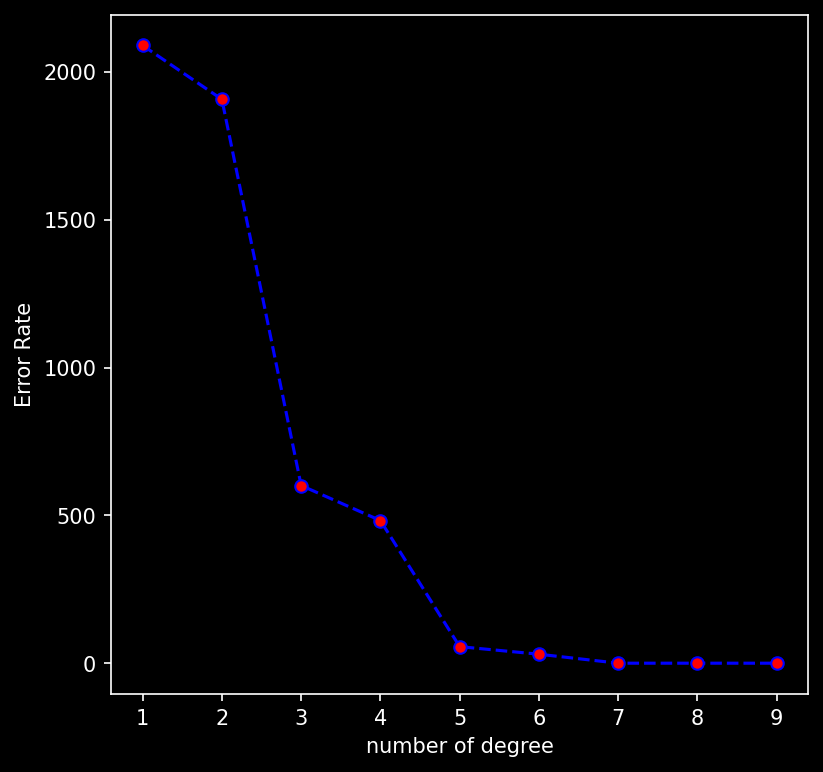

In [68]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.plot(range(1,10),rmse,linestyle='dashed',color='blue',marker='o',markerfacecolor='red')
plt.xlabel('number of degree')
plt.ylabel('Error Rate')
plt.xticks(range(1,10))

In [69]:
poly_reg = PolynomialFeatures(degree=5)
x_poly= poly_reg.fit_transform(X)
lin_reg= LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression()

Text(0, 0.5, 'Values')

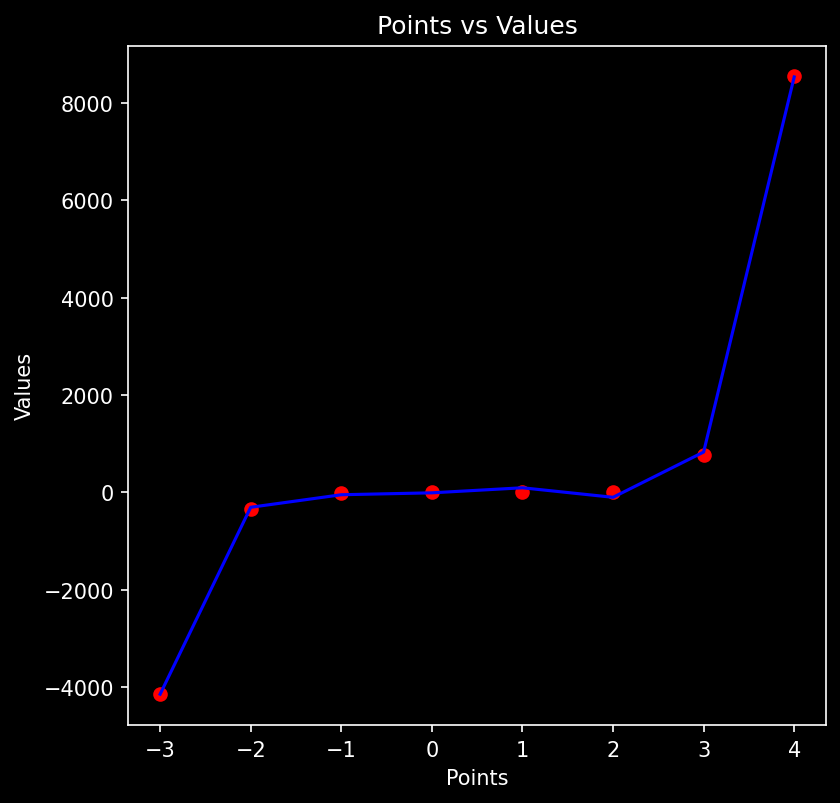

In [70]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X, y, color='red')
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title("Points vs Values")
plt.xlabel("Points")
plt.ylabel("Values")


In [71]:
print(mean_absolute_error(y, lin_reg.predict(poly_reg.fit_transform(X))))

43.531468531467624
